<a href="https://colab.research.google.com/github/ritwiks9635/My_priject_file_5/blob/main/Age_and_Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT REQUIRES MODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
# DATASET = "https://www.kaggle.com/datasets/jangedoo/utkface-new"

Unzip the dataset

In [ ]:
from zipfile import ZipFile
data = "/content/https:/www.kaggle.com/datasets/jangedoo/utkface-new/utkface-new.zip"
with ZipFile(data,"r") as zip:
  zip.extractall()
  print("the data has been extracted ")

the data has been extracted 


In [ ]:
path = Path("UTKFace/")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))
print(filenames[:3])

23708
['45_0_0_20170119195628780.jpg.chip.jpg', '40_0_0_20170117155031358.jpg.chip.jpg', '45_1_3_20170119171411898.jpg.chip.jpg']


Data preprocessing

In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [ ]:
image_path

['57_1_2_20170116192548730.jpg.chip.jpg',
 '85_1_0_20170110184106700.jpg.chip.jpg',
 '51_0_0_20170109141145066.jpg.chip.jpg',
 '9_0_2_20170110215518068.jpg.chip.jpg',
 '74_1_0_20170117171813979.jpg.chip.jpg',
 '63_1_0_20170110142522883.jpg.chip.jpg',
 '1_1_2_20161219162419463.jpg.chip.jpg',
 '1_0_2_20161219195130076.jpg.chip.jpg',
 '25_0_3_20170117135721856.jpg.chip.jpg',
 '35_1_1_20170112215240346.jpg.chip.jpg',
 '40_0_0_20170116222338389.jpg.chip.jpg',
 '32_0_0_20170120220856044.jpg.chip.jpg',
 '27_0_2_20170119193329569.jpg.chip.jpg',
 '52_0_4_20170104184746311.jpg.chip.jpg',
 '70_0_0_20170117173225496.jpg.chip.jpg',
 '35_0_4_20170104192501919.jpg.chip.jpg',
 '21_0_3_20170119153824472.jpg.chip.jpg',
 '24_1_2_20170116174415218.jpg.chip.jpg',
 '24_0_0_20170119151341215.jpg.chip.jpg',
 '1_1_4_20170109193346573.jpg.chip.jpg',
 '23_1_1_20170117175615774.jpg.chip.jpg',
 '72_0_0_20170113185248248.jpg.chip.jpg',
 '15_1_2_20170104015856031.jpg.chip.jpg',
 '24_1_0_20170117150538420.jpg.chip.jp

From Unstructured data to Structured data

In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [ ]:
df.head()

,image,age,gender
0,57_1_2_20170116192548730.jpg.chip.jpg,57,1
1,85_1_0_20170110184106700.jpg.chip.jpg,85,1
2,51_0_0_20170109141145066.jpg.chip.jpg,51,0
3,9_0_2_20170110215518068.jpg.chip.jpg,9,0
4,74_1_0_20170117171813979.jpg.chip.jpg,74,1


In [ ]:
df = df.astype({"age" : "float32", "gender": "int32"})

In [ ]:
df.dtypes

image      object
age       float32
gender      int32
dtype: object

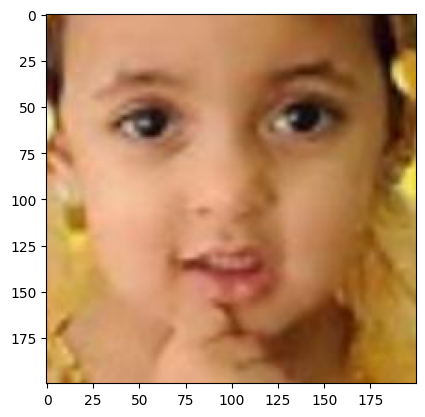

In [ ]:
img = Image.open("/content/UTKFace/"+df.image[55])
plt.imshow(img)

<ipython-input-29-eef84e7ff8f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

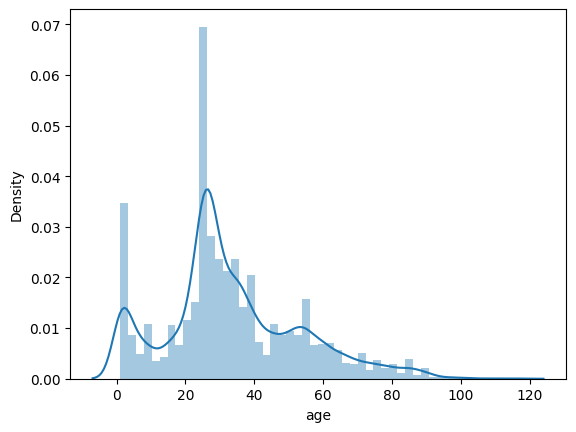

In [ ]:
sns.distplot(df["age"])

In [ ]:
gender = {0:"Male",1:"Female"}

Plotting Images

In [ ]:
# plot some samples of images

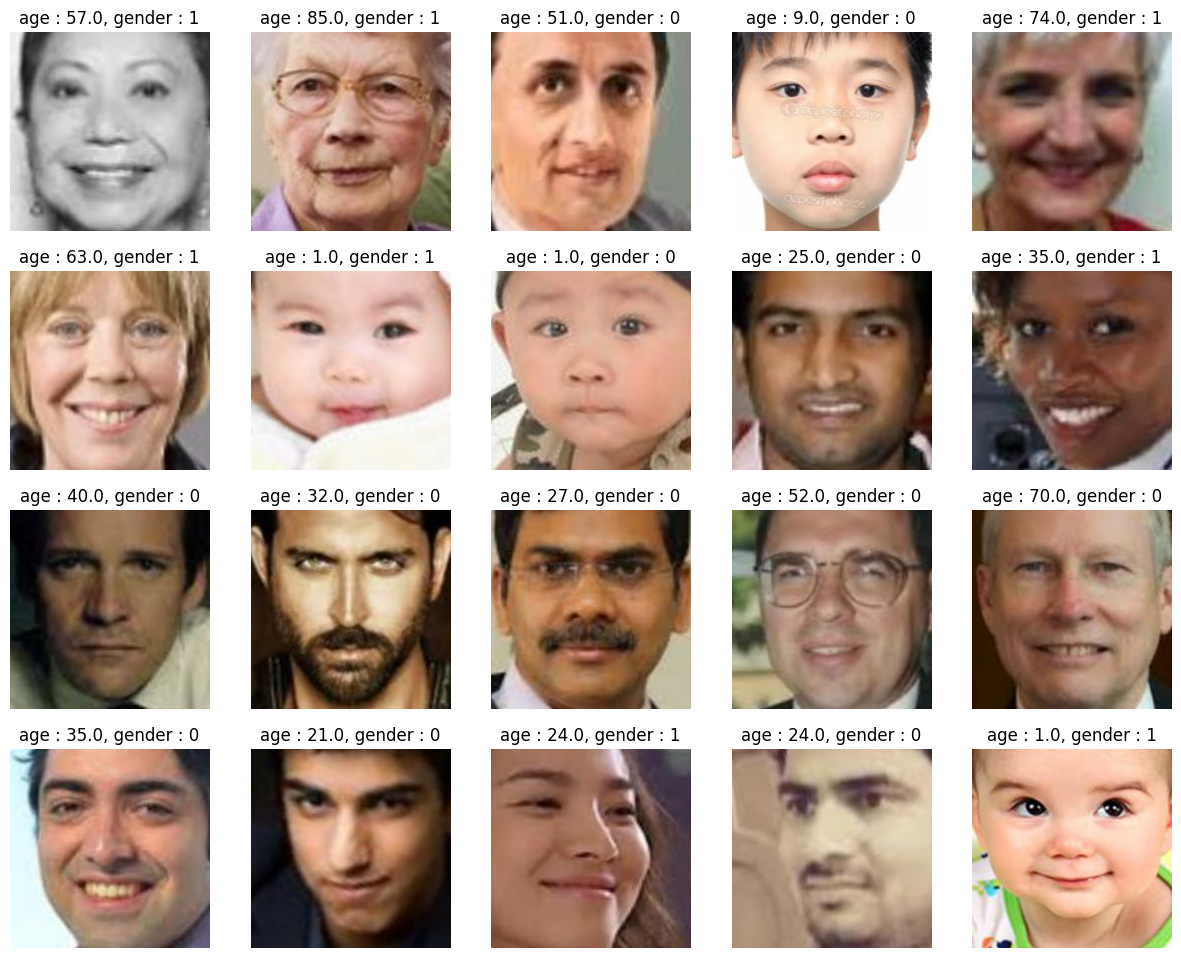

In [ ]:
data = df.iloc[0 : 20]
plt.figure(figsize=(15,15))
for i, img, age, gender in data.itertuples():
  plt.subplot(5,5, i+1)
  img = load_img("/content/UTKFace/"+img)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f"age : {age}, gender : {gender}")
  plt.axis("off")

In [ ]:
train, test = train_test_split(df, test_size=0.85, random_state = 42)

In [ ]:
train.head()

,image,age,gender
18199,2_1_3_20161219230048688.jpg.chip.jpg,2.0,1
19557,34_1_1_20170116222831261.jpg.chip.jpg,34.0,1
20132,13_1_0_20170109204055232.jpg.chip.jpg,13.0,1
11849,3_1_4_20161221192909421.jpg.chip.jpg,3.0,1
2100,28_0_3_20170119194909970.jpg.chip.jpg,28.0,0


Extracting Features

In [ ]:
# converting Image to numpy array
train_data = []
for i in train.image:
  img = load_img("/content/UTKFace/"+i, color_mode = "grayscale")
  img = img.resize((128,128), Image.ANTIALIAS)
  img = np.array(img)
  train_data.append(img)

train_data = np.array(train_data)
train_data = train_data.reshape(len(train_data),128,128,1)

In [ ]:
train_data.shape

(3556, 128, 128, 1)

In [ ]:
# Normalizing data

In [ ]:
train_data = train_data/255.0

In [ ]:
# convert the data in np array
gender_data = np.array(train.gender)
age_data = np.array(train.age)

Creating model

In [ ]:
inputs = Input((128,128,1))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [ ]:
model.compile(optimizer = "adam", loss = ['binary_crossentropy','mae'], metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 126, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

Training the model

In [ ]:
history = model.fit(x = train_data, y = [gender_data, age_data], epochs = 20, batch_size = 10, validation_split=0.1)

Epoch 1/20
320/320 [==============================] - 18s 14ms/step - loss: 15.9736 - gender_output_loss: 0.6638 - age_output_loss: 15.3098 - gender_output_accuracy: 0.6869 - age_output_accuracy: 0.0453 - val_loss: 24.4976 - val_gender_output_loss: 0.6292 - val_age_output_loss: 23.8684 - val_gender_output_accuracy: 0.6039 - val_age_output_accuracy: 0.0646
Epoch 2/20
320/320 [==============================] - 4s 12ms/step - loss: 12.7334 - gender_output_loss: 0.4764 - age_output_loss: 12.2570 - gender_output_accuracy: 0.7731 - age_output_accuracy: 0.0309 - val_loss: 12.0099 - val_gender_output_loss: 0.4266 - val_age_output_loss: 11.5833 - val_gender_output_accuracy: 0.7921 - val_age_output_accuracy: 0.0337
Epoch 3/20
320/320 [==============================] - 4s 12ms/step - loss: 10.9735 - gender_output_loss: 0.4102 - age_output_loss: 10.5633 - gender_output_accuracy: 0.8153 - age_output_accuracy: 0.0181 - val_loss: 10.2652 - val_gender_output_loss: 0.4036 - val_age_output_loss: 9.8616 

Visualizing loss of the model

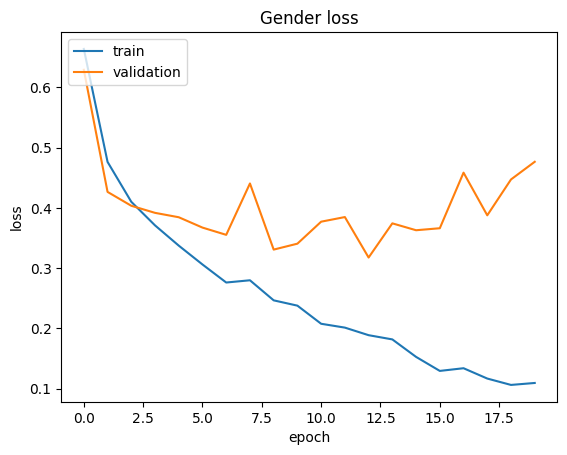

In [ ]:
plt.plot(history.history['gender_output_loss'])
plt.plot(history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

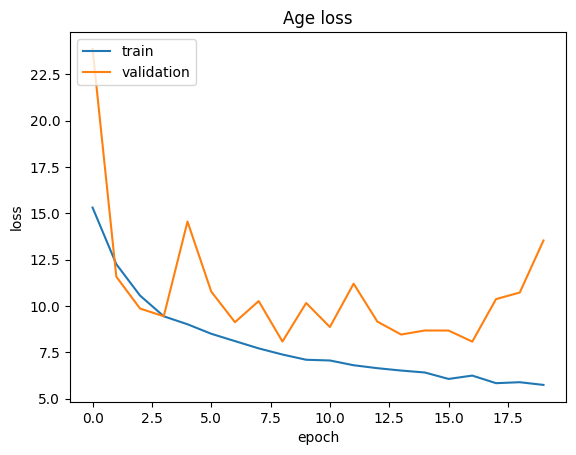

In [ ]:
plt.plot(history.history['age_output_loss'])
plt.plot(history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Predicting test image

Original: Gender =  Male  Age =  30.0
1/1 [==============================] - 0s 83ms/step
Prediction: Gender =  Male  Age =  21


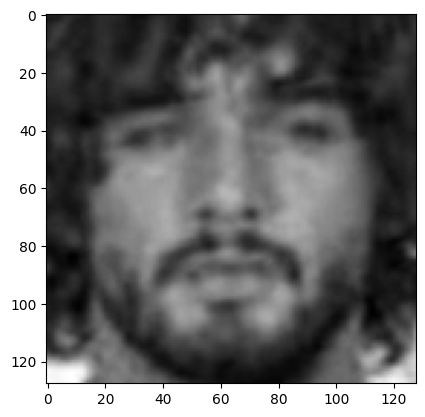

In [ ]:
index=53
print("Original: Gender = ", gender[gender_data[index]]," Age = ", age_data[index])

pred = model.predict(train_data[index].reshape(1, 128, 128, 1))
pred_gender = gender[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(train_data[index].reshape(128,128), cmap='gray')

Original: Gender =  Female  Age =  50.0
1/1 [==============================] - 0s 46ms/step
Prediction: Gender =  Female  Age =  26


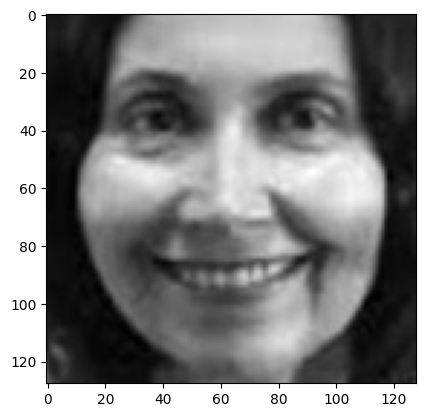

In [ ]:
index=45
print("Original: Gender = ", gender[gender_data[index]]," Age = ", age_data[index])

pred = model.predict(train_data[index].reshape(1, 128, 128, 1))
pred_gender = gender[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(train_data[index].reshape(128,128), cmap='gray')